## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto wine_quality_red-clean.csv',index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


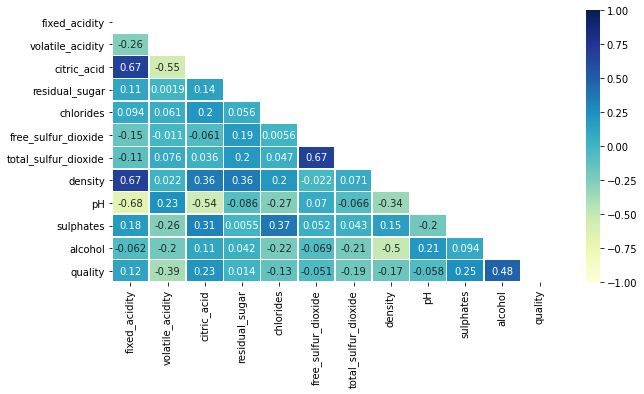

In [8]:
matriz_correlacion = df.corr()
mask = np.zeros_like(matriz_correlacion)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
ax = sns.heatmap(matriz_correlacion, mask=mask, vmin=-1,vmax=1,annot=True, cmap='YlGnBu', linewidths=.5)

pH en función de fixed_acidity y citric_acid

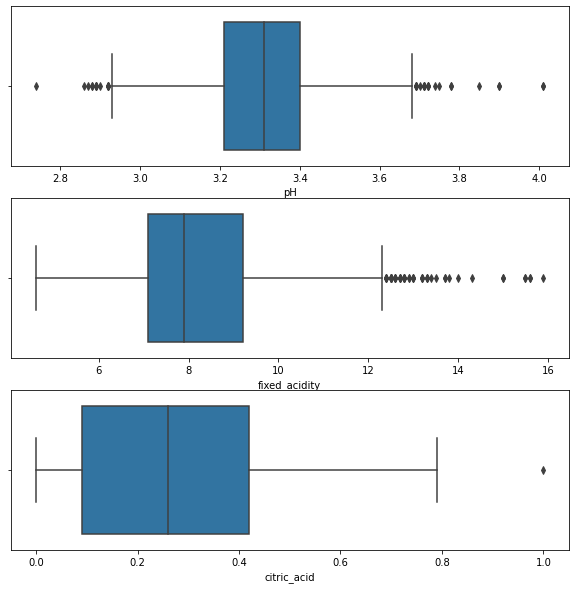

In [45]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
sns.boxplot(x=df['pH'],ax=ax[0])
sns.boxplot(x=df['fixed_acidity'],ax=ax[1])
sns.boxplot(x=df['citric_acid'],ax=ax[2])


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
X = df[['fixed_acidity','citric_acid','density']]
y= df['pH']

In [56]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [57]:
lr = LinearRegression()
lr.fit(X_training,y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr.score(X_test,y_test)

0.4365307506930172